# Import Data

In [53]:
import pandas as pd
import numpy as np 

In [54]:
data = pd.read_csv('Data/bbni_data_5y.csv')

In [55]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [56]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [57]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,3288.270208,3320.720243,3245.003495,3309.903564,48311000,0.0,0.0,2019-11-20
1,3299.086589,3342.353298,3255.819880,3331.536621,42079800,0.0,0.0,2019-11-21
2,3331.536921,3331.536921,3299.086886,3309.903564,21247000,0.0,0.0,2019-11-22
3,3299.087056,3309.903735,3234.186983,3245.003662,25178600,0.0,0.0,2019-11-25
4,3255.820341,3277.453699,3212.553625,3245.003662,73842800,0.0,0.0,2019-11-26


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [59]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [60]:
data['Dividends'].value_counts()

Dividends
0.00000      1208
103.12054       1
22.01131        1
73.14845        1
196.39006       1
280.49518       1
Name: count, dtype: int64

In [61]:
data['Stock Splits'].value_counts()

Stock Splits
0.0    1211
2.0       2
Name: count, dtype: int64

In [62]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [63]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [64]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [65]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [66]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [67]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [68]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [69]:
data.head()

,Open,High,Low,Close,Volume,date,return,log_return,ma_5,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,3331.536621,3342.353298,3309.903266,3331.536621,45188200,2019-12-17,0.000000,0.000000,3296.923389,3276.371729,3270.963477,3290.321411,3283.007058,3270.963477,39.920722,3350.804920,3191.122033,1,12
1,3331.536729,3396.436795,3309.903373,3385.620117,84394000,2019-12-18,0.016234,0.016103,3322.883398,3293.678418,3274.749304,3307.648449,3292.779730,3274.749304,46.804623,3368.358550,3181.140059,2,12
2,3385.620117,3396.436795,3353.170084,3385.620117,38600800,2019-12-19,0.000000,0.000000,3348.843408,3309.903418,3277.453479,3321.825116,3301.621672,3277.453479,51.577264,3380.608006,3174.298952,3,12
3,3385.620389,3385.620389,3353.170354,3374.803711,37723600,2019-12-20,-0.003195,-0.003200,3361.823438,3319.638452,3280.698486,3331.457587,3308.591390,3280.698486,55.610263,3391.919013,3169.477960,4,12
4,3396.436929,3428.886963,3374.803572,3428.886963,45834400,2019-12-23,0.016026,0.015899,3381.293506,3334.781812,3289.892651,3349.172019,3320.048111,3289.892651,63.970625,3417.833902,3161.951401,0,12


In [70]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Modelling

## Preprocessing

In [71]:
dataUsed = data[['Close', 'Open']]

In [72]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
dataUsed['Close'] = scaler.fit_transform(dataUsed.Close.values.reshape(-1,1))
dataUsed['Open'] = scaler.fit_transform(dataUsed.Open.values.reshape(-1,1))

data_scaled = np.array(dataUsed)

data_scaled

C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\1216798107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUsed['Close'] = scaler.fit_transform(dataUsed.Close.values.reshape(-1,1))
C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\1216798107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUsed['Open'] = scaler.fit_transform(dataUsed.Open.values.reshape(-1,1))


array([[0.42342612, 0.42342611],
       [0.43533507, 0.42342613],
       [0.43533507, 0.43533505],
       ...,
       [0.76218885, 0.77540057],
       [0.75778494, 0.75998689],
       [0.75778494, 0.76218884]])

## Train Test Sequence

In [73]:
import numpy as np

sequence_length = 60
x = []
y = []

# Target tetap kolom 0 (harga close), tetapi kita hanya menggunakan kolom lain sebagai input
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i, 0:])  
    y.append(data_scaled[i, 0]) 

# Konversi ke array numpy
x, y = np.array(x), np.array(y)


In [74]:
print(x.shape, y.shape)

(1134, 60, 2) (1134,)


## LSTM

In [75]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [90]:
# LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
# train model with early stopping
model.fit(x_train, y_train, epochs=30, batch_size=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0179 - val_loss: 0.0027
Epoch 2/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 3/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 4/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 5/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 6/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 7/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 8/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 9/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 10/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0011 - val_loss: 0.0085
Epoch 11/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 12/30
182/182 ━━━━━━━━━━━━━━━━━━━━

In [92]:
# prediction
predicted_prices =  model.predict(x_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [93]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0] 

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [94]:
# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [95]:
real_prices_padded_train = np.hstack([np.zeros((y_train.shape[0], expected_columns - 1)), y_train.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices_train = scaler.inverse_transform(real_prices_padded_train)[:, -1]  # Ambil hanya kolom harga

# Evaluation

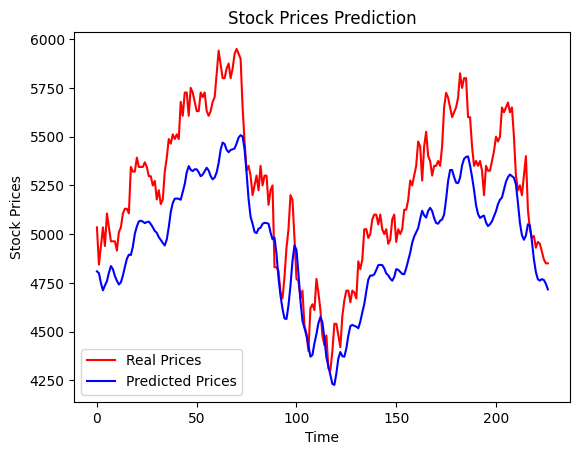

In [96]:
# conpare real and predicted prices
import matplotlib.pyplot as plt

plt.plot(real_prices, color='red', label='Real Prices')
plt.plot(predicted_prices, color='blue', label='Predicted Prices')
plt.title('Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [97]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['date'][-len(real_prices):], y=real_prices, mode='lines', name='Real Prices'))
fig.add_trace(go.Scatter(x=data['date'][-len(predicted_prices):], y=predicted_prices.reshape(-1), mode='lines', name='Predicted Prices'))

fig.update_layout(title='Stock Prices Prediction',
                     xaxis_title='Time',
                     yaxis_title='Stock Prices')

fig.show()



In [98]:
print("Real Prices: ", real_prices)
print("Predicted Prices: ", predicted_prices)
print("Difference: ", real_prices - predicted_prices)

Real Prices:  [5034.41259766 4843.53417969 4938.97363281 5034.41259766 4938.97363281
 5105.99169922 5034.41259766 4962.83300781 4962.83300781 4962.83300781
 4915.11376953 5010.55273438 5034.41259766 5105.99169922 5129.8515625
 5129.8515625  5105.99169922 5344.58984375 5320.72998047 5320.72998047
 5392.30908203 5344.58984375 5344.58984375 5344.58984375 5368.44921875
 5344.58984375 5296.87011719 5296.87011719 5249.15039062 5273.01025391
 5177.57128906 5225.29052734 5153.71142578 5177.57128906 5320.72998047
 5392.30908203 5487.74804688 5463.88867188 5511.60791016 5487.74804688
 5511.60791016 5487.74804688 5678.62646484 5607.04736328 5726.34619141
 5726.34619141 5607.04736328 5750.20556641 5726.34619141 5678.62646484
 5630.90673828 5630.90673828 5726.34619141 5702.48632812 5726.34619141
 5630.90673828 5607.04736328 5630.90673828 5678.62646484 5702.48632812
 5821.78515625 5941.08398438 5869.50488281 5800.         5800.
 5850.         5875.         5800.         5850.         5925.
 5950.   

In [99]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

np.float64(291.0230320281641)

In [100]:
# calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_prices, predicted_prices)
mae

np.float64(262.5815119143431)

Directional Accuracy adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi arah perubahan harga (naik atau turun) dibandingkan dengan nilai aktual. Ini adalah metrik yang sangat berguna dalam prediksi saham karena dalam banyak kasus, arah perubahan harga lebih penting daripada nilai absolut dari harga itu sendiri—terutama jika tujuannya adalah untuk membuat keputusan beli atau jual.

In [101]:
# direction accuracy
direction_accuracy = np.mean(np.sign(real_prices[1:] - real_prices[:-1]) == np.sign(predicted_prices[1:] - predicted_prices[:-1]))
direction_accuracy

np.float64(0.4336283185840708)

# Save Model

In [102]:
# # Save the entire model
# model.save('Model/lstm_model_bbni.h5')


# Close Only

In [103]:
data_used = data.filter(['Close'])

dataset = data_used.values

training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

956

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.42342612],
       [0.43533507],
       [0.43533507],
       ...,
       [0.76218885],
       [0.75778494],
       [0.75778494]])

In [105]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.42342612, 0.43533507, 0.43533507, 0.43295334, 0.44486223,
       0.44724406, 0.44486223, 0.43771685, 0.43057157, 0.43295334,
       0.41628085, 0.40913551, 0.39722652, 0.42342612, 0.42580796,
       0.43057157, 0.43771685, 0.4210444 , 0.42342612, 0.43057157,
       0.40913551, 0.41151724, 0.41628085, 0.41866262, 0.42342612,
       0.39960835, 0.40199007, 0.39008124, 0.38055412, 0.37579051,
       0.36864518, 0.39008124, 0.39722652, 0.39008124, 0.39008124,
       0.3876994 , 0.38531763, 0.38293585, 0.39484484, 0.40675368,
       0.41628085, 0.42342612, 0.43057157, 0.44486223, 0.43057157,
       0.41151724, 0.40437196, 0.38531763, 0.36388157, 0.35911802,
       0.3523691 , 0.35727678, 0.37199978, 0.35973065, 0.31801559,
       0.24440083, 0.2468547 , 0.23213176, 0.18305531, 0.18305531])]
[np.float64(0.16489697608024145)]

[array([0.42342612, 0.43533507, 0.43533507, 0.43295334, 0.44486223,
       0.44724406, 0.44486223, 0.43771685, 0.43057157, 0.43295334,
       0.41628085, 0.40

In [106]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=5, epochs=30)

Epoch 1/30


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0126
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0016
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7.3281e-04
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7.9614e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 6.2493e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.4341e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.5897e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4.4379e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4.3667e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4.0772e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.3918e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.7676e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.5790e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.4566e-04
Epoch 

In [107]:
test_data = scaled_data[training_data_len - 60: , :]
print(len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


298
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = dataset[training_data_len:, :]
test = predictions[:-1, 0]

rmse = np.sqrt(np.mean(predictions - y_test)**2)
mae = mean_absolute_error(predictions, y_test)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  20.10297400210084
MAE:  71.69899307379201


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\1510546548.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



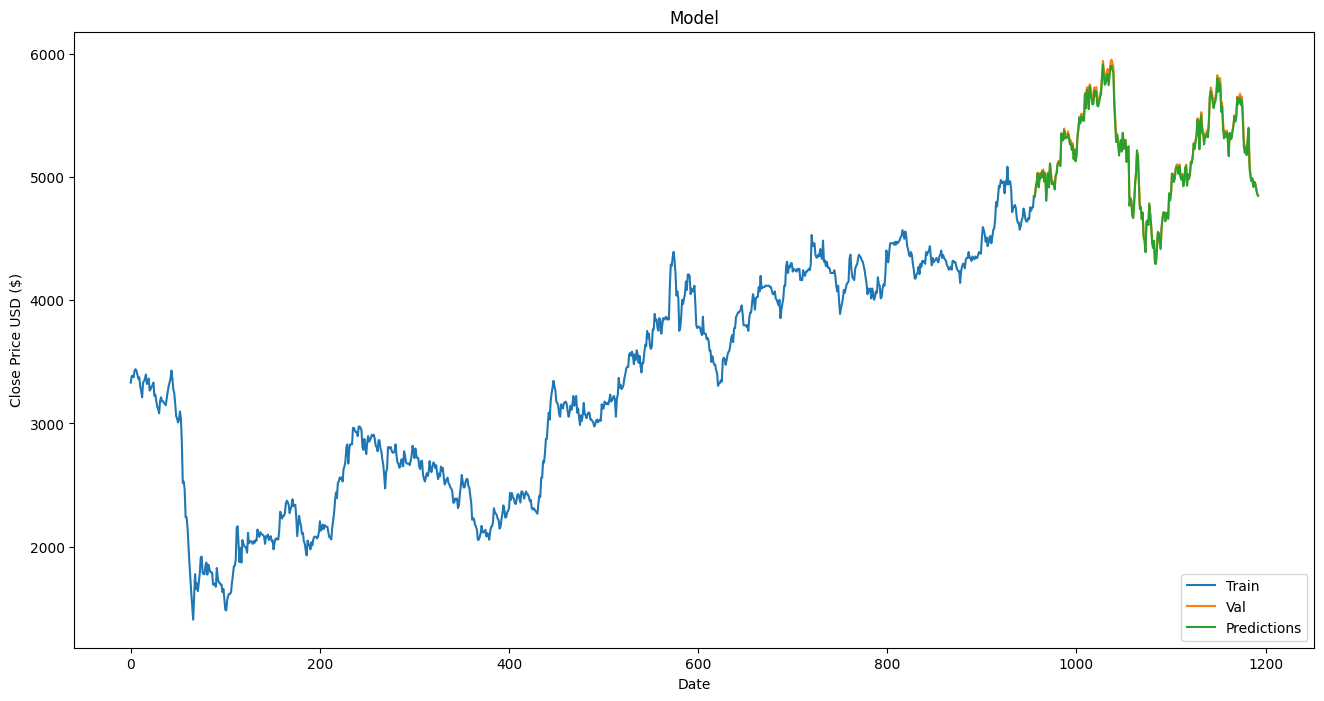

In [109]:
train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [110]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news sentiment siebert

In [111]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed

C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\412406848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [112]:
news = pd.read_csv('Data/bbni sentiment analysis.csv')
# delete columns except date and sentiment and title
news = news[['publish_date', 'sentiment', 'title']]
news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

# hanya gunakan data diatas tanggal 2019-12-17

news = news[news.index >= '2019-12-17']

news

,sentiment,title
date,,
2024-11-11 12:45:00,NEGATIVE,Berapa Harga Saham BBCA Hari Ini?
2024-11-08 15:15:00,NEGATIVE,Dua Mata Pisau Penghapusan Utang UMKM
2024-11-06 13:44:00,NEGATIVE,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa..."
2024-11-05 08:13:00,POSITIVE,IHSG Hari Ini Diramal Bergerak Fluktuatif
2024-10-29 08:30:00,POSITIVE,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ..."
...,...,...
2020-03-10 15:05:00,POSITIVE,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...
2020-03-10 11:18:00,NEGATIVE,Alasan 12 BUMN Buyback Saham Rp 8 T
2020-03-10 10:45:00,POSITIVE,12 BUMN Siap Buyback Saham Rp 8 T


In [113]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()


In [114]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,sentiment,title
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [115]:
# cari data title yang ada di news dan tidak ada di dfMerge

news[~news.index.isin(dfMerge.index)]

# cari tanggal terdekat yang ada di dfMerge berdasar data yang ada di news dan tidak ada di dfMerge

,sentiment,title
date,,
2020-09-27,POSITIVE,Mau Cuan Minggu Depan? Cek Nih 6 Rekomendasi S...
2021-04-04,POSITIVE,"Intip Laba Bersih 10 Bank Terbesar RI, Siapa T..."
2021-04-25,NEGATIVE,"AEON Mall Sentul City Dijual Rp 1,9 T, Buat Apa?"
2021-10-17,POSITIVE,Asal Muasal Rumor BNI Akuisisi Bank
2021-10-31,POSITIVE,BNI Gandeng fishOn Dorong Ekspor Perikanan Mau...
2022-01-30,POSITIVE,"Torehkan Kinerja Excellence, BNI Terus Didoron..."
2022-04-16,POSITIVE,"BNI Ekspansi Green Banking Korporasi Rp 6,1 Tr..."
2022-05-04,POSITIVE,BNI Fasilitasi Kegiatan Ekspor-Impor 200.000 D...
2022-05-05,POSITIVE,Nasabah di Amerika Ungkap Dukungan BNI untuk U...


In [116]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close sentiment title
2019-12-17  3331.536621       NaN   NaN
2019-12-18  3385.620117       NaN   NaN
2019-12-19  3385.620117       NaN   NaN
2019-12-20  3374.803711       NaN   NaN
2019-12-23  3428.886963       NaN   NaN
...                 ...       ...   ...
2024-11-14  4950.000000       NaN   NaN
2024-11-15  4910.000000       NaN   NaN
2024-11-18  4870.000000       NaN   NaN
2024-11-19  4850.000000       NaN   NaN
2024-11-20  4850.000000       NaN   NaN

[1201 rows x 3 columns]


sentiment
POSITIVE    149
NEGATIVE     51
Name: count, dtype: int64

In [117]:
# Pastikan kolom 'title' di dfMerge tidak memiliki NaN untuk perbandingan
dfMerge_titles = dfMerge['title'].dropna()

# Filter berita di news yang tidak ada di dfMerge berdasarkan 'title'
missing_news = news[~news['title'].isin(dfMerge_titles)]

# Tampilkan hasil
print(missing_news)

dfMerge['sentiment'].value_counts()


Empty DataFrame
Columns: [sentiment, title, nearest_date]
Index: []


sentiment
POSITIVE    149
NEGATIVE     51
Name: count, dtype: int64

In [118]:
print(dfMerge['sentiment'].unique())

dfMerge['sentiment'] = dfMerge['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': -1}).fillna(0)

print(dfMerge['sentiment'].unique())

dfMerge['sentiment'].value_counts()

[nan 'POSITIVE' 'NEGATIVE']
[ 0.  1. -1.]


sentiment
 0.0    1001
 1.0     149
-1.0      51
Name: count, dtype: int64

In [119]:
# Contoh data sentimen
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data


array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [120]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [121]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0166
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0015
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 9.2311e-04
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0010
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 8.4455e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 6.0671e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 6.9883e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 8.3024e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 6.9731e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 3.4962e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.0012e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.6501e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.1353e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.4133e-04
Epoch 15/3

In [122]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  111.8601280974671
MAE:  104.0281623391544


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



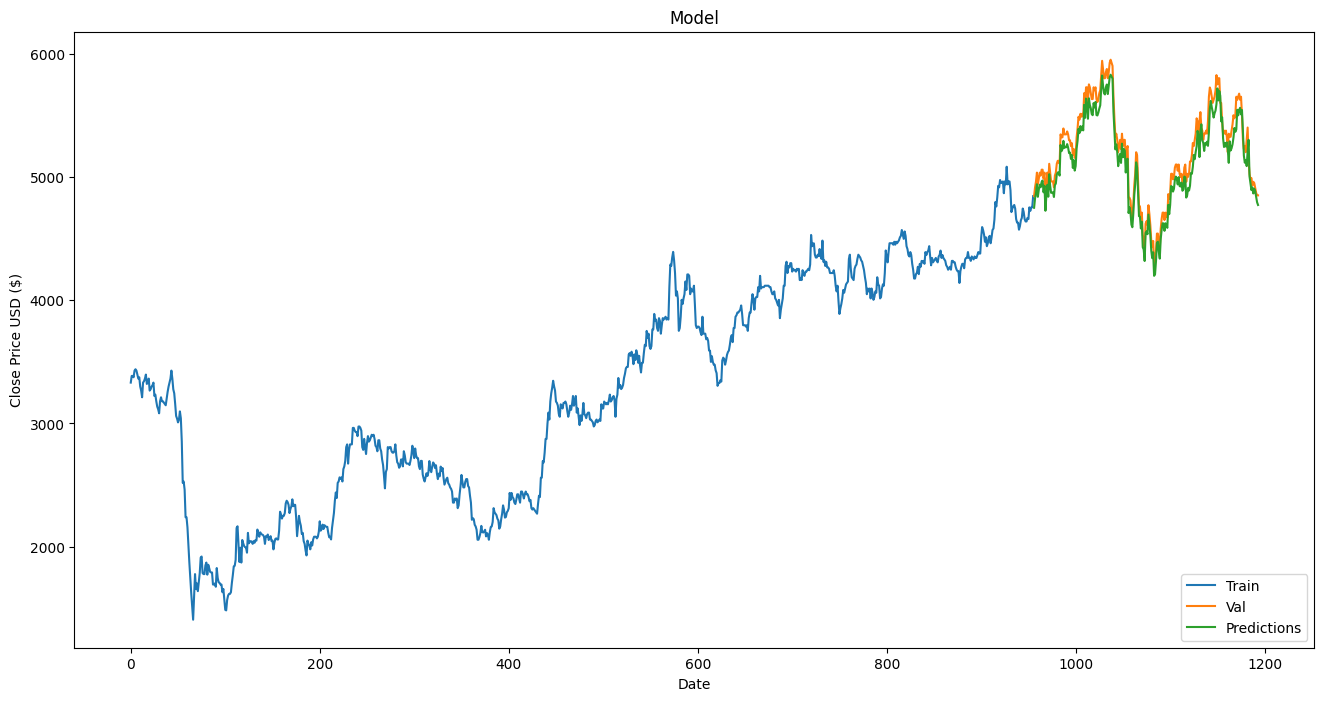

In [124]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [125]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news manual sentiment

In [126]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}


In [127]:
import pandas as pd


news = pd.read_csv('Data/bbni - manual.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\2427528238.py:14: FutureWarning:

Parsed string "Monday, 11 Nov 2024 12:45 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



,title,sentiment
date,,
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,positif
2024-11-08 15:15:00,Dua Mata Pisau Penghapusan Utang UMKM,negatif
2024-11-06 13:44:00,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa...",negatif
2024-11-05 08:13:00,IHSG Hari Ini Diramal Bergerak Fluktuatif,negatif
2024-10-29 08:30:00,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ...",negatif
...,...,...
2020-03-10 15:05:00,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...,positif
2020-03-10 11:18:00,Alasan 12 BUMN Buyback Saham Rp 8 T,positif
2020-03-10 10:45:00,12 BUMN Siap Buyback Saham Rp 8 T,negatif


In [128]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\2178100794.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [129]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()

In [130]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [131]:
dfMerge['sentiment'].value_counts()

sentiment
positif    143
negatif     29
Name: count, dtype: int64

In [132]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close title sentiment
2019-12-17  3331.536621   NaN       NaN
2019-12-18  3385.620117   NaN       NaN
2019-12-19  3385.620117   NaN       NaN
2019-12-20  3374.803711   NaN       NaN
2019-12-23  3428.886963   NaN       NaN
...                 ...   ...       ...
2024-11-14  4950.000000   NaN       NaN
2024-11-15  4910.000000   NaN       NaN
2024-11-18  4870.000000   NaN       NaN
2024-11-19  4850.000000   NaN       NaN
2024-11-20  4850.000000   NaN       NaN

[1201 rows x 3 columns]


sentiment
positif    170
negatif     30
Name: count, dtype: int64

In [133]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1001
 1.0     170
-1.0      30
Name: count, dtype: int64

In [134]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [135]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [136]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0198
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0011
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0010
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 8.2601e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 6.4338e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 8.4584e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5.0381e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4.8734e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4.3598e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5.6625e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.8247e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5.2089e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.7510e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.9365e-04
Epoch 15/3

In [137]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  102.31278703643954
MAE:  91.43874737394958


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



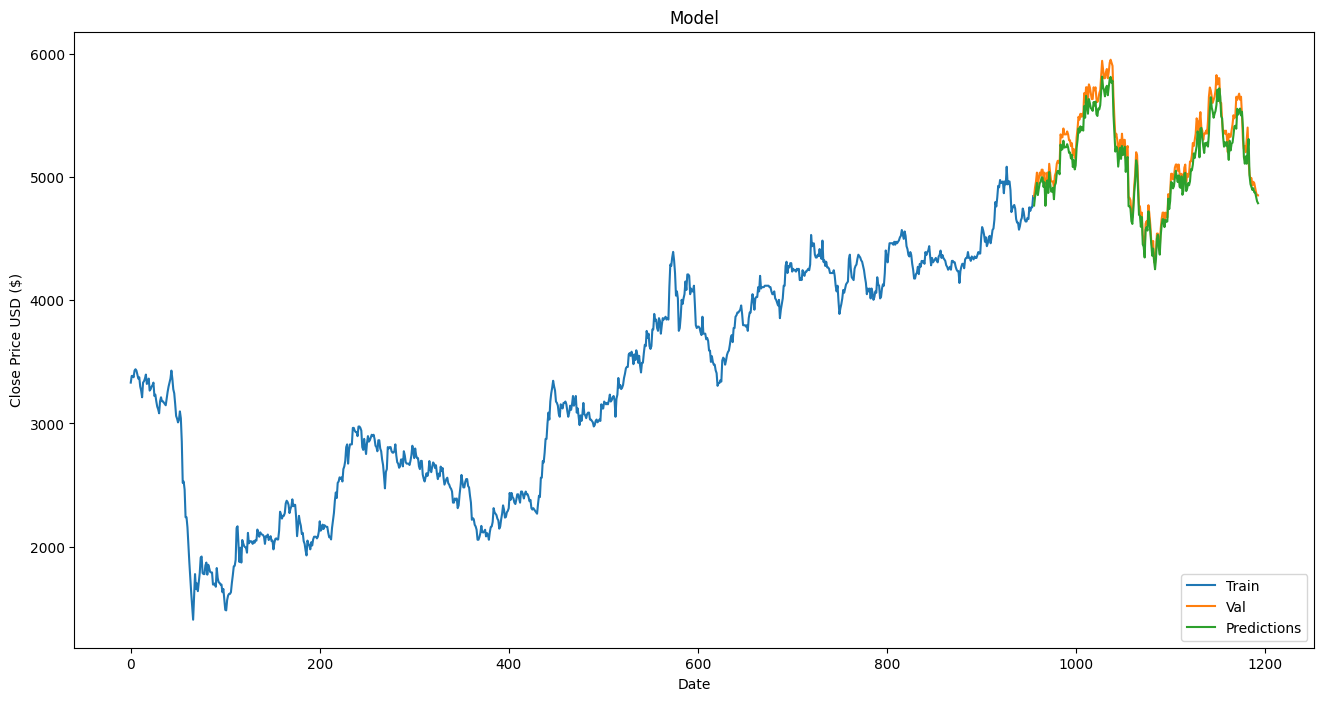

In [139]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [140]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news body sentiment

In [141]:
import pandas as pd


news = pd.read_csv('Data/BBNI DAVIN  - BBNI ISI.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\2479426553.py:14: FutureWarning:

Parsed string "Monday, 11 Nov 2024 12:45 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



,title,sentiment
date,,
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,negatif
2024-11-08 15:15:00,Dua Mata Pisau Penghapusan Utang UMKM,negatif
2024-11-06 13:44:00,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa...",negatif
2024-11-05 08:13:00,IHSG Hari Ini Diramal Bergerak Fluktuatif,positif
2024-10-29 08:30:00,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ...",positif
...,...,...
2020-03-10 15:05:00,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...,positif
2020-03-10 11:18:00,Alasan 12 BUMN Buyback Saham Rp 8 T,positif
2020-03-10 10:45:00,12 BUMN Siap Buyback Saham Rp 8 T,positif


In [142]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\2178100794.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [143]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()

In [144]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [145]:
dfMerge['sentiment'].value_counts()

sentiment
positif    132
negatif     40
Name: count, dtype: int64

In [146]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close title sentiment
2019-12-17  3331.536621   NaN       NaN
2019-12-18  3385.620117   NaN       NaN
2019-12-19  3385.620117   NaN       NaN
2019-12-20  3374.803711   NaN       NaN
2019-12-23  3428.886963   NaN       NaN
...                 ...   ...       ...
2024-11-14  4950.000000   NaN       NaN
2024-11-15  4910.000000   NaN       NaN
2024-11-18  4870.000000   NaN       NaN
2024-11-19  4850.000000   NaN       NaN
2024-11-20  4850.000000   NaN       NaN

[1201 rows x 3 columns]


sentiment
positif    160
negatif     40
Name: count, dtype: int64

In [147]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1001
 1.0     160
-1.0      40
Name: count, dtype: int64

In [148]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [149]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [150]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0141
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0011
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 8.4722e-04
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 9.4571e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 7.8811e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.2796e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.3309e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.6227e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.2694e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.2219e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.6584e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.9991e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.5986e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.5889e-04
Epoch 

In [151]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  85.02475200914277
MAE:  71.91482569590336


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



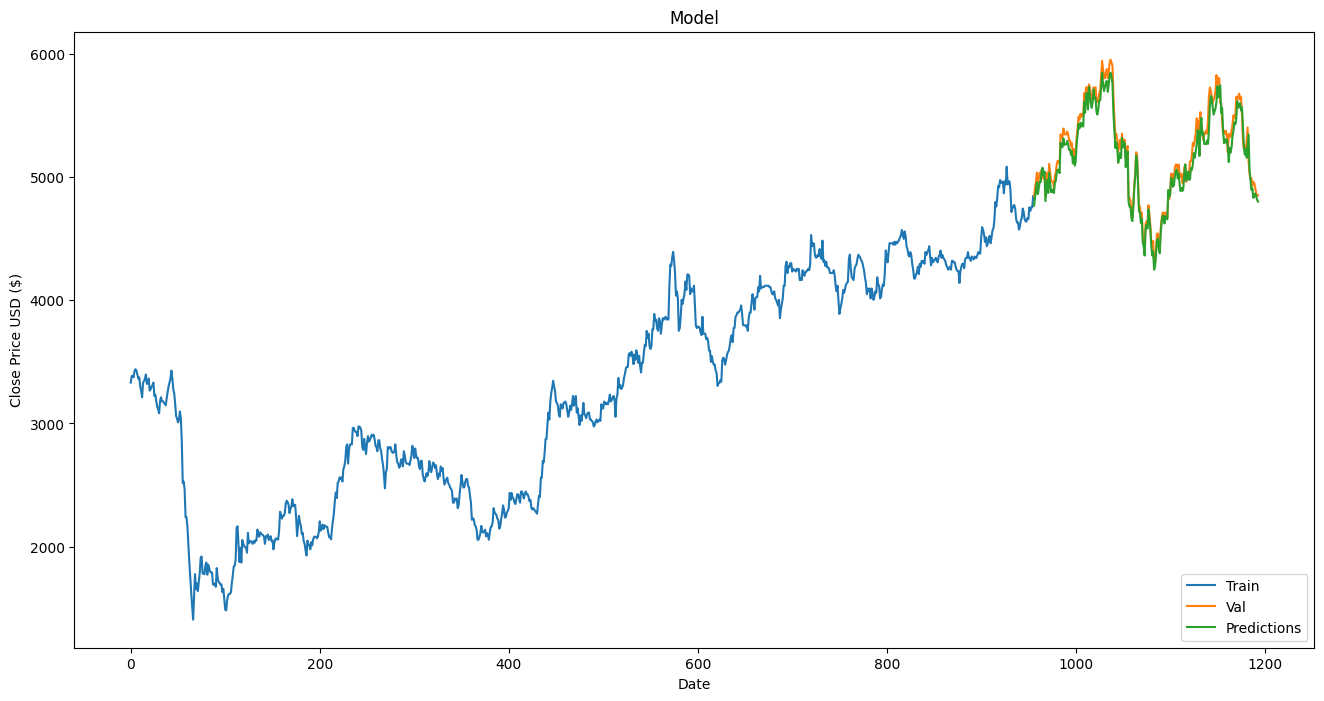

In [153]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [154]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close stock sentiment

In [155]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}

In [156]:
import pandas as pd


news = pd.read_csv('Data/BBNI DAVIN  - BBNI CLOSE.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\346590751.py:14: FutureWarning:

Parsed string "Monday, 11 Nov 2024 12:45 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



,title,sentiment
date,,
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,negatif
2024-11-08 15:15:00,Dua Mata Pisau Penghapusan Utang UMKM,negatif
2024-11-06 13:44:00,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa...",negatif
2024-11-05 08:13:00,IHSG Hari Ini Diramal Bergerak Fluktuatif,negatif
2024-10-29 08:30:00,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ...",negatif
...,...,...
2020-03-10 15:05:00,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...,negatif
2020-03-10 11:18:00,Alasan 12 BUMN Buyback Saham Rp 8 T,negatif
2020-03-10 10:45:00,12 BUMN Siap Buyback Saham Rp 8 T,negatif


In [157]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\2178100794.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [158]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()

In [159]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [160]:
dfMerge['sentiment'].value_counts()

sentiment
negatif    87
positif    85
Name: count, dtype: int64

In [161]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close title sentiment
2019-12-17  3331.536621   NaN       NaN
2019-12-18  3385.620117   NaN       NaN
2019-12-19  3385.620117   NaN       NaN
2019-12-20  3374.803711   NaN       NaN
2019-12-23  3428.886963   NaN       NaN
...                 ...   ...       ...
2024-11-14  4950.000000   NaN       NaN
2024-11-15  4910.000000   NaN       NaN
2024-11-18  4870.000000   NaN       NaN
2024-11-19  4850.000000   NaN       NaN
2024-11-20  4850.000000   NaN       NaN

[1201 rows x 3 columns]


sentiment
negatif    101
positif     99
Name: count, dtype: int64

In [162]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1001
-1.0     101
 1.0      99
Name: count, dtype: int64

In [163]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [164]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  85.02475200914277
MAE:  71.91482569590336


C:\Users\Acer\AppData\Local\Temp\ipykernel_29536\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



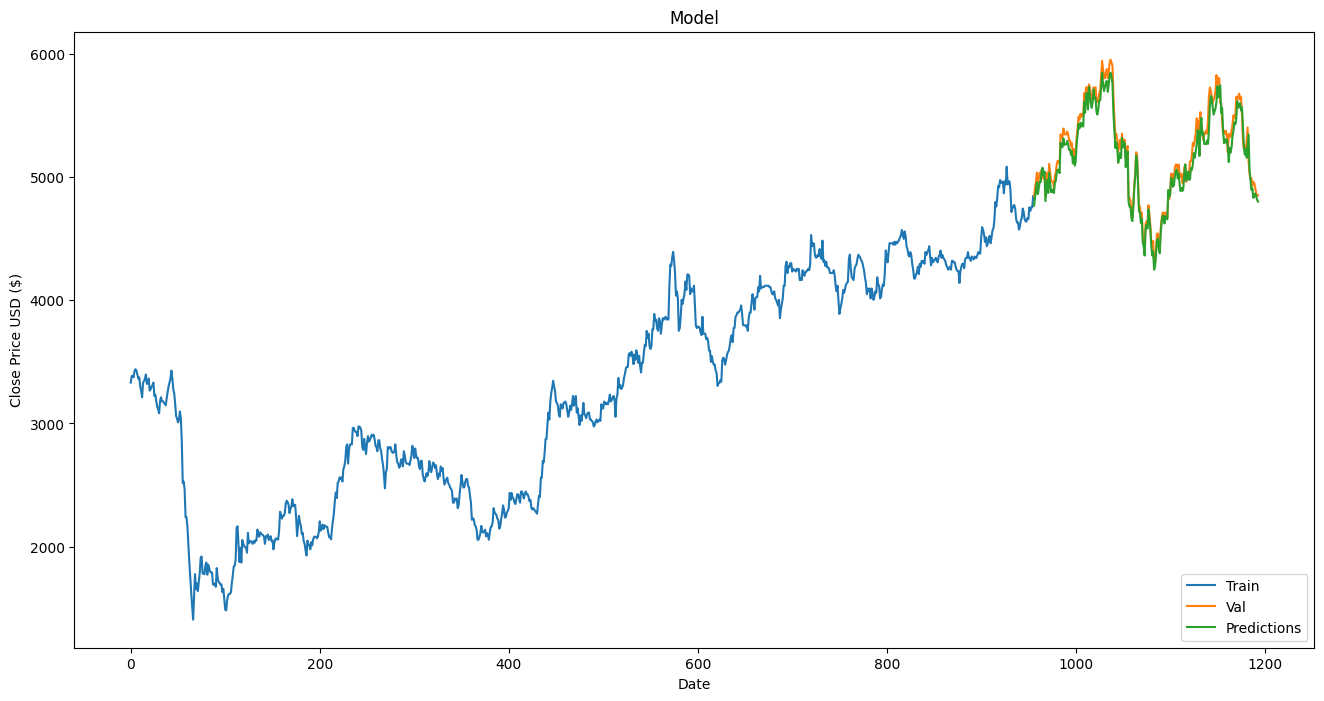

In [166]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [167]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# END